In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [4]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3   # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

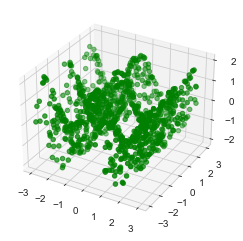

In [14]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, c='green')

In [15]:
# Build the MODEL
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [16]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
# Train the MODEL
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
    train_losses = np.zeros(epochs)
    
    for i in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        loss.backward()
        optimizer.step()
        
        train_losses[i] = loss.item()
        
        if (i+1) % 50 == 0:
            print(f'Epoch {i+1}/{epochs}, Train Loss: {loss.item():.4f}')
        
    return train_losses

In [19]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.7135
Epoch 100/1000, Train Loss: 0.3217
Epoch 150/1000, Train Loss: 0.1506
Epoch 200/1000, Train Loss: 0.0333
Epoch 250/1000, Train Loss: 0.0125
Epoch 300/1000, Train Loss: 0.0072
Epoch 350/1000, Train Loss: 0.0085
Epoch 400/1000, Train Loss: 0.0048
Epoch 450/1000, Train Loss: 0.0042
Epoch 500/1000, Train Loss: 0.0041
Epoch 550/1000, Train Loss: 0.0036
Epoch 600/1000, Train Loss: 0.0033
Epoch 650/1000, Train Loss: 0.0032
Epoch 700/1000, Train Loss: 0.0033
Epoch 750/1000, Train Loss: 0.0029
Epoch 800/1000, Train Loss: 0.0029
Epoch 850/1000, Train Loss: 0.0027
Epoch 900/1000, Train Loss: 0.0026
Epoch 950/1000, Train Loss: 0.0025
Epoch 1000/1000, Train Loss: 0.0067


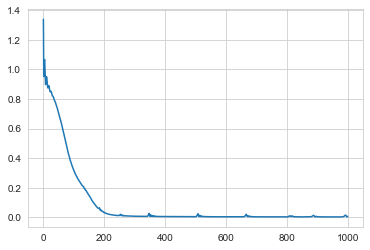

In [20]:
plt.plot(train_losses)

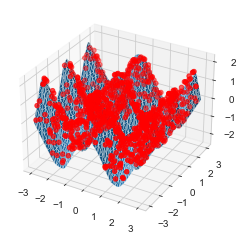

In [22]:
# Plot the predictions surface
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, c='red')

# surface plot
with torch.no_grad():
    line = np.linspace(-3, 3, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)

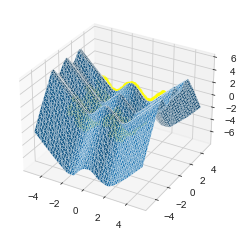

In [24]:
# EXTRAPOLATE ?
# Plot the predictions surface
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, c='yellow')

# surface plot
with torch.no_grad():
    line = np.linspace(-5, 5, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)